## Sentiment Analysis

In [1]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

#text normalization function
%run ./Text_Normalization_Function.ipynb

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mingdaliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [2]:
df=pd.read_csv('/Users/mingdaliu/Downloads/DisneylandReviews.csv', encoding = 'latin-1')

In [3]:
df['Time'] = pd.to_datetime(df['Year_Month'], errors = 'coerce', format='%Y-%m')

In [4]:
#Select positive and negative reviews from 2016 to the most recent date.
#The reviews with ratings greater than or equal to 4 can be seen as positive reviews. Otherwise, they are negative reviews.
positive_reviews = df[(df['Rating']>=4) & (df["Time"]>='2016-01-01')]
negative_reviews = df[(df['Rating']<4) & (df["Time"]>='2016-01-01')]
df['Polarity'] = ['Positive' if x>=4 else "Negative" if x<4 else "Missing" for x in df['Rating']]
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Time,Polarity
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019-04-01,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019-05-01,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019-04-01,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019-04-01,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019-04-01,Positive


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_df, test_df=train_test_split(df, train_size=0.5)


print("Dimensions for test data:", test_df.shape)
print("Dimensions for training data:", train_df.shape,"\n")
print("First 5 rows in test dataset: \n", test_df.head(),"\n")
print("First 5 rows in  training dataset: \n", train_df.head())

Dimensions for test data: (21328, 8)
Dimensions for training data: (21328, 8) 

First 5 rows in test dataset: 
        Review_ID  Rating Year_Month Reviewer_Location  \
9264   120184152       5     2011-6             India   
13075  476255937       4     2017-4     United States   
19373  268424334       1     2015-4            Canada   
1209   569393418       5     2018-2     United States   
11082  575044152       4     2018-4         Australia   

                                             Review_Text  \
9264   Once your in Hongkong, your in heaven and in h...   
13075  Going during spring break I knew there would b...   
19373  Rides were broken down and closed. We waited i...   
1209   It was fun to experience Hong Kong Disneyland,...   
11082  Had a magical time here on a 4 day park hopper...   

                      Branch       Time  Polarity  
9264     Disneyland_HongKong 2011-06-01  Positive  
13075  Disneyland_California 2017-04-01  Positive  
19373  Disneyland_California

In [6]:
test_reviews = np.array(test_df['Review_Text'])
test_polarity = np.array(test_df['Polarity'])

train_reviews = np.array(train_df['Review_Text'])
train_polarity = np.array(train_df['Polarity'])

In [7]:
normalized_test_reviews = normalize_corpus(test_reviews)
normalized_train_reviews = normalize_corpus(train_reviews)

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
def analyze_sentiment_vader_lexicon(review, threshold = -0.32, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'Positive' if scores['compound'] >= threshold else 'Negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [38]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=-0.32) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,Positive,0.9894
1,Positive,0.9505
2,Negative,-0.8917
3,Positive,0.9769
4,Positive,0.7988


In [12]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_polarity, 
                                                        VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.83 



In [13]:
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,Negative,Positive,All
True:,,,
Negative,1185,3149,4334
Positive,467,16527,16994
All,1652,19676,21328


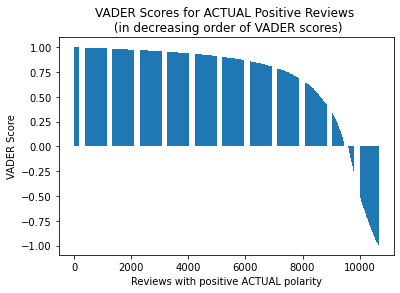

In [40]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:10664]['VADER Score']
plt.bar(range(0, 10664), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

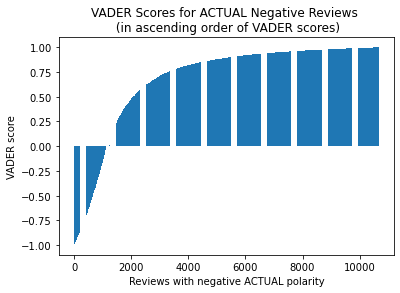

In [42]:
neg_reviews_scored = VADER_polarity_test_df[10664:21327]['VADER Score']
plt.bar(range(0, 10663), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

In [16]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['Positive' if s >= threshold_for_pos else 'Negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_polarity, VADER_binary_polarity)
    return(accuracy) 

In [43]:
threshold = -0.3
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold))

Accuracy rate:  0.8304576144036009


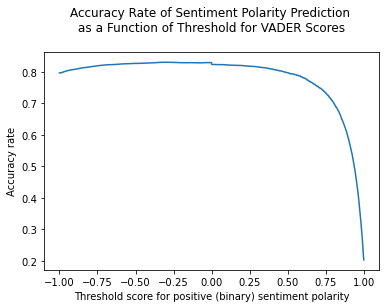

In [44]:
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

In [45]:
thresholds[acc_rates.index(max(acc_rates))]

-0.2952952952952953

## Topic Modeling

In [20]:
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mingdaliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mingdaliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [22]:
normalized_positive = normalize_corpus(positive_reviews["Review_Text"])
normalized_negative = normalize_corpus(negative_reviews["Review_Text"])

In [23]:
#define the bag-of-words vectorizer:
bow_vectorizer = CountVectorizer(max_features=1000)

#vectorize the normalized data:
vectorized_positive = bow_vectorizer.fit_transform(normalized_positive)
vectorized_negative = bow_vectorizer.fit_transform(normalized_negative)

In [24]:
pd.DataFrame(data = vectorized_positive.todense(), columns = bow_vectorizer.get_feature_names())

,10am,25th,30pm,able,absolute,absolutely,accept,access,across,action,...,worth,wow,write,wrong,year,yell,yes,yet,young,yr
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13119,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13121,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
pd.DataFrame(data = vectorized_negative.todense(), columns = bow_vectorizer.get_feature_names())

,10am,25th,30pm,able,absolute,absolutely,accept,access,across,action,...,worth,wow,write,wrong,year,yell,yes,yet,young,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
lda_positive = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(vectorized_positive)
lda_negative = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(vectorized_negative)

In [27]:
no_top_words_news = 10
display_topics(lda_positive, bow_vectorizer.get_feature_names(), no_top_words_news)
display_topics(lda_negative, bow_vectorizer.get_feature_names(), no_top_words_news)

Topic 0:
food shove dark park right parade rather certainly grand discount
Topic 1:
right park ticket dark voucher local fastpass past ups luck
Topic 2:
ticket disgust pm view park dark magical ground discount right
Topic 3:
park discount right disgust music slow worth view stand little
Topic 0:
disney park staff people us time disneyland member service year
Topic 1:
ride queue park close day time disney food hour good
Topic 2:
line ride wait park time day fast hour pas people
Topic 3:
park disney disneyland ride visit small good day kid much


In [28]:
positive_weights = lda_positive.components_ / lda_positive.components_.sum(axis=1)[:, np.newaxis]
positive_weights_df = pd.DataFrame(positive_weights.T, 
                               index = bow_vectorizer.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
positive_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
10am,0.000373,0.000761,0.000002,0.000002
25th,0.000630,0.000127,0.000002,0.000002
30pm,0.000149,0.000264,0.000312,0.000100
able,0.000243,0.000002,0.000668,0.000002
absolute,0.000404,0.000098,0.000364,0.000097
absolutely,0.001148,0.000112,0.000002,0.000002
accept,0.000152,0.000219,0.000380,0.000071
access,0.000002,0.000668,0.000002,0.000002
across,0.000047,0.004364,0.001122,0.001775
action,0.000125,0.000002,0.000492,0.000166


In [29]:
negative_weights = lda_negative.components_ / lda_negative.components_.sum(axis=1)[:, np.newaxis]
negative_weights_df = pd.DataFrame(negative_weights.T, 
                               index = bow_vectorizer.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
negative_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
10am,0.000007,0.000935,0.000127,0.000006
25th,0.000267,0.000547,0.000005,0.000006
30pm,0.000007,0.000451,0.000237,0.000006
able,0.000633,0.000381,0.003106,0.000876
absolute,0.000298,0.000310,0.000116,0.000006
absolutely,0.001543,0.000718,0.000540,0.000006
accept,0.000753,0.000176,0.000005,0.000109
access,0.000886,0.000536,0.000533,0.000006
across,0.000670,0.000507,0.000267,0.000208
action,0.000449,0.000390,0.000005,0.000212


In [30]:
pd.set_option('display.max_columns', None)
positive_weights_df.sort_values(by='Topic_0',ascending=False).head(50)
pd.DataFrame(positive_weights.T, index = bow_vectorizer.get_feature_names()).T

,10am,25th,30pm,able,absolute,absolutely,accept,access,across,action,activity,actual,actually,add,addition,admission,adult,advance,advantage,adventure,advice,advise,afternoon,age,ago,ahead,air,airport,allow,almost,along,already,although,always,amaze,amazing,america,american,amount,amusement,anaheim,anniversary,annoy,annual,another,answer,anymore,anyone,anything,anyway,anywhere,apart,app,apparently,appear,appreciate,april,area,around,arrival,arrive,atmosphere,attempt,attention,attitude,attraction,august,autograph,available,average,avoid,aware,away,awesome,awful,baby,bad,badly,bag,bar,barely,base,basic,basically,bathroom,beautiful,become,begin,behind,believe,best,beyond,big,birthday,bit,block,board,boat,book,booking,booth,bore,boring,bother,bottle,boy,brand,break,breakfast,brilliant,bring,broken,buffet,build,building,burger,bus,business,busy,buy,buzz,ca,cafe,california,call,cancel,cant,capacity,car,card,care,caribbean,carry,cart,case,cast,castle,catch,cater,cause,certain,certainly,chance,change,character,charge,charm,cheap,check,chicken,child,childrens,chinese,chip,choice,choose,christmas,city,classic,clean,clear,clearly,close,closed,closing,closure,coaster,coffee,coke,cold,comment,company,compare,comparison,complain,complaint,complete,completely,condition,consider,constantly,construction,continue,control,cool,cost,could,country,couple,course,cover,crazy,cream,create,crowd,crowded,cruise,crush,cry,cup,customer,cut,dark,date,daughter,day,de,deal,decent,decide,decoration,definitely,design,despite,detail,didnt,difference,different,difficult,difficulty,dinner,direction,dirty,disability,disabled,disappoint,disappointed,disappointing,disappointment,discount,disgust,disney,disneyland,disneyworld,display,dl,dlp,dog,dollar,donald,dont,door,double,doubt,download,downtown,dream,dress,drink,drive,drop,due,dumbo,earlier,early,earth,easily,easy,eat,effort,either,else,elsewhere,email,employee,empty,encounter,end,english,enjoy,enjoyable,enough,enter,entertainment,entire,entrance,entry,especially,etc,euro,europe,even,evening,event,ever,every,everyone,everything,everywhere,exactly,example,excellent,except,exception,excite,excited,excitement,exciting,exit,expect,expectation,expensive,experience,explain,express,extra,extremely,eye,face,facility,fact,fail,fair,fall,family,fan,fantastic,fantasy,fantasyland,far,fast,fastpass,fastpasses,fault,favorite,favourite,february,fee,feel,feeling,felt,figure,fill,film,finally,fine,finish,fire,firework,first,firstly,fix,flight,floor,florida,fly,folk,follow,food,foot,force,forget,forward,fountain,france,free,french,friday,friend,friendly,front,frontierland,frozen,fry,full,fully,fun,future,game,gate,general,generally,gift,girl,give,glad,good,grand,granddaughter,great,greed,greet,grizzly,ground,group,grow,grumpy,guess,guest,guy,half,hall,halloween,hand,handle,happen,happy,hard,hardly,hat,hate,haunt,haunted,head,hear,heat,hell,help,helpful,high,highlight,highly,hit,hk,hold,holder,holiday,hollywood,home,honest,honestly,hong,hop,hope,hopper,horrendous,horrible,hot,hotel,hour,house,however,hr,huge,hundred,husband,hyperspace,ice,idea,imagine,impossible,impressed,improve,include,incredibly,indiana,inform,information,inside,instead,interesting,iron,island,issue,item,january,job,joke,jones,july,jump,june,jungle,keep,kid,kind,king,kingdom,know,kong,la,lack,lady,land,large,last,late,later,learn,least,leave,less,let,level,life,light,lightyear,like,limit,limited,line,lion,list,literally,little,live,load,local,location,long,longer,look,lose,lot,love,lovely,low,luck,lucky,lunch,machine,magic,magical,main,mainly,maintain,maintenance,major,majority,man,manage,management,manor,mansion,many,map,march,massive,matter,matterhorn,max,may,maybe,meal,mean,meet,member,memory,mention,menu,merchandise,mickey,mid,middle,might,mile,min,mind,mine,minimum,minnie,minute,miserable,miss,mistake,moment,monday,money,month,morning,mostly,mountain,mouse,move,movie,mtr,much,multiple,music,must,mystic,name,near,nearly,need,negative,never,new,next,nice,nig

In [31]:
negative_weights_df.sort_values(by='Topic_0',ascending=False).head(50)
pd.DataFrame(negative_weights.T, index = bow_vectorizer.get_feature_names()).T

,10am,25th,30pm,able,absolute,absolutely,accept,access,across,action,activity,actual,actually,add,addition,admission,adult,advance,advantage,adventure,advice,advise,afternoon,age,ago,ahead,air,airport,allow,almost,along,already,although,always,amaze,amazing,america,american,amount,amusement,anaheim,anniversary,annoy,annual,another,answer,anymore,anyone,anything,anyway,anywhere,apart,app,apparently,appear,appreciate,april,area,around,arrival,arrive,atmosphere,attempt,attention,attitude,attraction,august,autograph,available,average,avoid,aware,away,awesome,awful,baby,bad,badly,bag,bar,barely,base,basic,basically,bathroom,beautiful,become,begin,behind,believe,best,beyond,big,birthday,bit,block,board,boat,book,booking,booth,bore,boring,bother,bottle,boy,brand,break,breakfast,brilliant,bring,broken,buffet,build,building,burger,bus,business,busy,buy,buzz,ca,cafe,california,call,cancel,cant,capacity,car,card,care,caribbean,carry,cart,case,cast,castle,catch,cater,cause,certain,certainly,chance,change,character,charge,charm,cheap,check,chicken,child,childrens,chinese,chip,choice,choose,christmas,city,classic,clean,clear,clearly,close,closed,closing,closure,coaster,coffee,coke,cold,comment,company,compare,comparison,complain,complaint,complete,completely,condition,consider,constantly,construction,continue,control,cool,cost,could,country,couple,course,cover,crazy,cream,create,crowd,crowded,cruise,crush,cry,cup,customer,cut,dark,date,daughter,day,de,deal,decent,decide,decoration,definitely,design,despite,detail,didnt,difference,different,difficult,difficulty,dinner,direction,dirty,disability,disabled,disappoint,disappointed,disappointing,disappointment,discount,disgust,disney,disneyland,disneyworld,display,dl,dlp,dog,dollar,donald,dont,door,double,doubt,download,downtown,dream,dress,drink,drive,drop,due,dumbo,earlier,early,earth,easily,easy,eat,effort,either,else,elsewhere,email,employee,empty,encounter,end,english,enjoy,enjoyable,enough,enter,entertainment,entire,entrance,entry,especially,etc,euro,europe,even,evening,event,ever,every,everyone,everything,everywhere,exactly,example,excellent,except,exception,excite,excited,excitement,exciting,exit,expect,expectation,expensive,experience,explain,express,extra,extremely,eye,face,facility,fact,fail,fair,fall,family,fan,fantastic,fantasy,fantasyland,far,fast,fastpass,fastpasses,fault,favorite,favourite,february,fee,feel,feeling,felt,figure,fill,film,finally,fine,finish,fire,firework,first,firstly,fix,flight,floor,florida,fly,folk,follow,food,foot,force,forget,forward,fountain,france,free,french,friday,friend,friendly,front,frontierland,frozen,fry,full,fully,fun,future,game,gate,general,generally,gift,girl,give,glad,good,grand,granddaughter,great,greed,greet,grizzly,ground,group,grow,grumpy,guess,guest,guy,half,hall,halloween,hand,handle,happen,happy,hard,hardly,hat,hate,haunt,haunted,head,hear,heat,hell,help,helpful,high,highlight,highly,hit,hk,hold,holder,holiday,hollywood,home,honest,honestly,hong,hop,hope,hopper,horrendous,horrible,hot,hotel,hour,house,however,hr,huge,hundred,husband,hyperspace,ice,idea,imagine,impossible,impressed,improve,include,incredibly,indiana,inform,information,inside,instead,interesting,iron,island,issue,item,january,job,joke,jones,july,jump,june,jungle,keep,kid,kind,king,kingdom,know,kong,la,lack,lady,land,large,last,late,later,learn,least,leave,less,let,level,life,light,lightyear,like,limit,limited,line,lion,list,literally,little,live,load,local,location,long,longer,look,lose,lot,love,lovely,low,luck,lucky,lunch,machine,magic,magical,main,mainly,maintain,maintenance,major,majority,man,manage,management,manor,mansion,many,map,march,massive,matter,matterhorn,max,may,maybe,meal,mean,meet,member,memory,mention,menu,merchandise,mickey,mid,middle,might,mile,min,mind,mine,minimum,minnie,minute,miserable,miss,mistake,moment,monday,money,month,morning,mostly,mountain,mouse,move,movie,mtr,much,multiple,music,must,mystic,name,near,nearly,need,negative,never,new,next,nice,nig

In [32]:
#prepare to display result of positive reviews in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_positive, vectorized_positive, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  28.912433
0        1.782994 -295.079681       2        1  26.299558
2      220.811432 -343.832123       3        1  25.733515
3       50.533993  -76.050934       4        1  19.054494, topic_info=          Term         Freq         Total Category  logprob  loglift
321   fastpass  3223.000000   3223.000000  Default  30.0000  30.0000
568      music  2281.000000   2281.000000  Default  29.0000  29.0000
662         pm  4644.000000   4644.000000  Default  28.0000  28.0000
638       past  3012.000000   3012.000000  Default  27.0000  27.0000
497      local  3725.000000   3725.000000  Default  26.0000  26.0000
..         ...          ...           ...      ...      ...      ...
301  expensive   801.034499   3064.853065   Topic4  -4.9098   0.3160
202       dark  1063.420604  11195.434684   Topic4  -4.6264  -0.6961
383     ground   881.919657   5339.321912   Topic4  -4.8136  -0.1429
885     ticket   914.432066  11070.292286   Topic4  -4.7774  -0.8359
531        may   702.297472   2290.256506   Topic4  -5.0413   0.4758

[282 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7         1  0.991671  access
8         1  0.663424  across
8         2  0.006459  across
8         3  0.152246  across
8         4  0.178082  across
...     ...       ...     ...
990       4  0.823462   worth
995       1  0.174015    yell
995       2  0.050568    yell
995       3  0.723129    yell
995       4  0.052353    yell

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [33]:
#prepare to display result of negative reviews in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_positive, vectorized_negative, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  36.124886
1        1.782994 -295.079681       2        1  27.010994
3      220.811432 -343.832123       3        1  20.704609
2       50.533993  -76.050934       4        1  16.159510, topic_info=         Term         Freq        Total Category  logprob  loglift
662        pm  1303.000000  1303.000000  Default  30.0000  30.0000
321  fastpass  1049.000000  1049.000000  Default  29.0000  29.0000
568     music   864.000000   864.000000  Default  28.0000  28.0000
638      past   981.000000   981.000000  Default  27.0000  27.0000
230   disgust  2895.000000  2895.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
740     right   535.953491  5080.669713   Topic4  -4.0930  -0.4265
628    parade   318.272463  1525.824951   Topic4  -4.6141   0.2553
841      step   231.886718   715.070924   Topic4  -4.9308   0.6965
573    nearly   249.877445  1002.065756   Topic4  -4.8561   0.4338
967   weekend   245.723756  1025.711505   Topic4  -4.8728   0.3937

[284 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7         2  0.995741  access
8         1  0.008653  across
8         2  0.674959  across
8         3  0.210564  across
8         4  0.103840  across
...     ...       ...     ...
990       4  0.109793   worth
995       1  0.093027    yell
995       2  0.219359    yell
995       3  0.076948    yell
995       4  0.610989    yell

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [34]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [35]:
#Log-Likelihood:
print("Log-Likelihood (higher values are better): ", lda_positive.score(vectorized_positive))



#Perplexity score:
print("Perplexity (lower values are better): ", lda_positive.perplexity(vectorized_positive))



#Coherence score for 4 topics:
#tokenizing the corpus
positive_tokenized = [tokenize_text(normalized_positive[doc_id]) for doc_id in range(len(normalized_positive))]

#Dictionary of the corpus:
positive_dictionary = Dictionary(positive_tokenized)

#Bag-of-words representation for each document of the corpus:
positive_bow = [positive_dictionary.doc2bow(doc) for doc in positive_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_positive, n_words=20)
topic_topwords_4_topics = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_positive, n_words=20)
positive_cm_4_topics = CoherenceModel(topics=topic_topwords_4_topics, 
                             corpus = positive_bow, 
                             dictionary = positive_dictionary, coherence='u_mass')

#Overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(positive_cm_4_topics.get_coherence(), 4))  



Log-Likelihood (higher values are better):  -3468748.575391395
Perplexity (lower values are better):  439.08887791929845
Coherence score for the model: (higher values are better) -4.1265


In [36]:
#Log-Likelihood:
print("Log-Likelihood (higher values are better): ", lda_negative.score(vectorized_negative))



#Perplexity score:
print("Perplexity (lower values are better): ", lda_negative.perplexity(vectorized_negative))



#Coherence score for 4 topics:
#tokenizing the corpus
negative_tokenized = [tokenize_text(normalized_negative[doc_id]) for doc_id in range(len(normalized_negative))]

#Dictionary of the corpus:
negative_dictionary = Dictionary(negative_tokenized)

#Bag-of-words representation for each document of the corpus:
negative_bow = [negative_dictionary.doc2bow(doc) for doc in negative_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_negative, n_words=20)
topic_topwords_4_topics = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_negative, n_words=20)
negative_cm_4_topics = CoherenceModel(topics=topic_topwords_4_topics, 
                             corpus = negative_bow, 
                             dictionary = negative_dictionary, coherence='u_mass')

#Overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(negative_cm_4_topics.get_coherence(), 4)) 

Log-Likelihood (higher values are better):  -1222760.5373513328
Perplexity (lower values are better):  470.0807056828281
Coherence score for the model: (higher values are better) -1.2715
